In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

# Chaos Dungeons With Aura
Normal vs rested rewards

In [143]:
resources = ['red', 'blue', 'shards', 'stones']
dng_order = ['Star-1', 'Star-2', 'Moon-1', 'Moon-2', 'Moon-3', 'Sun-1'] #, 'Sun-2', 'Sun-3']

In [144]:
df = (
    pd.read_csv('histories/cd_aor.csv')
    .query('ilvl >= 1100')           # tier 3 only
    .query('bonus_floor == "None"')  # ignore bonus floor runs
    .query('stones < 20')            # obvious bad entries
    .query('shards > 0')             # obvious bad entries
    .drop(['at_level', 'ilvl'], axis=1)
)
# df['dungeon'] = pd.Categorical(df['dungeon'], dng_order)
df.head()

,timestamp,character,dungeon,rested,bonus_floor,red,blue,shards,stones
0,2022-04-14-20:28:10,Jazzercist,Moon-1,False,None,42,105,1280,1
1,2022-04-15-08:55:54,Jazzercist,Moon-1,False,None,40,163,1264,0
2,2022-04-15-09:05:30,Jazzercist,Moon-1,False,None,37,157,1432,0
3,2022-04-15-11:15:00,Derplearning,Star-1,True,None,56,227,1956,5
4,2022-04-15-11:22:03,Derplearning,Star-1,False,None,29,110,984,2


## Overview

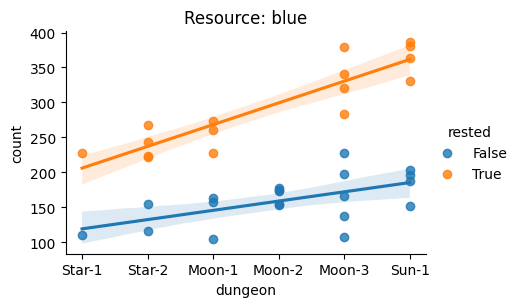

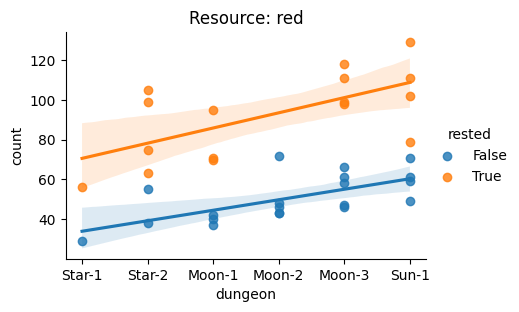

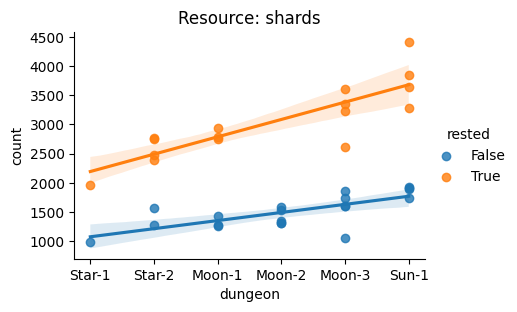

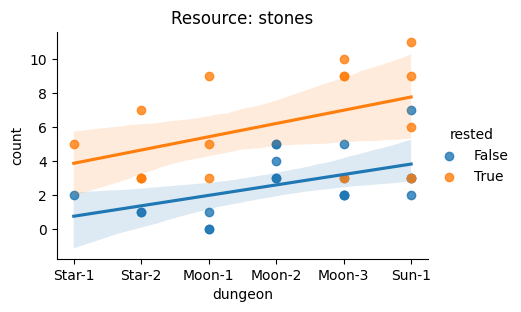

In [145]:
mdf = df.melt(
    id_vars=['timestamp', 'rested', 'dungeon'],
    value_vars=resources,
    var_name='resource',
    value_name='count',
)

mdf.dungeon = mdf.dungeon.apply(lambda d: dng_order.index(d))

for res, gdf in mdf.groupby('resource'):
    sb.lmplot(data=gdf, x='dungeon', y='count', hue='rested', aspect=1.5, height=3)
    plt.xticks(ticks=range(len(dng_order)), labels=dng_order)
    plt.title(f'Resource: {res}')

### Stats

In [146]:
(
    df[['dungeon', 'rested', *resources]]
    .groupby(['dungeon', 'rested'])
    .agg(['min', 'mean', 'max'])
    .applymap(round)
    .T
)

dungeon     Moon-1       Moon-2 Moon-3       Star-1       Star-2       Sun-1  \
rested       False  True  False  False  True  False  True  False  True False   
red    min      37    70     43     46    98     29    56     38    63    49   
       mean     40    79     50     56   106     29    56     46    86    60   
       max      42    95     72     66   118     29    56     55   105    71   
blue   min     105   227    154    107   283    110   227    116   222   152   
       mean    142   253    167    167   331    110   227    136   239   185   
       max     163   273    178    228   379    110   227    155   268   204   
shards min    1264  2744   1313   1044  2615    984  1956   1274  2390  1742   
       mean   1325  2821   1418   1568  3199    984  1956   1419  2591  1867   
       max    1432  2937   1582   1860  3606    984  1956   1564  2761  1931   
stones min       0     3      3      2     3      2     5      1     3     2   
       mean      0     6      4      3     8      2     5      1     4     4   
       max       1     9      5      5    10      2     5      1     7     7   

dungeon            
rested       True  
red    min     79  
       mean   105  
       max    129  
blue   min    331  
       mean   366  
       max    387  
shards min   3290  
       mean  3799  
       max   4410  
stones min      3  
       mean     7  
       max     11

### Expected Values

In [147]:
df.groupby(['dungeon', 'rested']).agg('mean').applymap(round).T

dungeon Moon-1       Moon-2 Moon-3       Star-1       Star-2       Sun-1      
rested   False  True  False  False  True  False  True  False  True False  True
red         40    79     50     56   106     29    56     46    86    60   105
blue       142   253    167    167   331    110   227    136   239   185   366
shards    1325  2821   1418   1568  3199    984  1956   1419  2591  1867  3799
stones       0     6      4      3     8      2     5      1     4     4     7